In [ ]:
import numpy as n
import pandas as p
import matplotlib.pyplot as m
import seaborn as s
%matplotlib inline

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [ ]:
s.set_style("darkgrid")
m.rcParams['font.size'] = 14
m.rcParams['figure.figsize'] = (9, 5)
m.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
train_raw = p.read_csv('/content/Train.csv', delimiter = ';')
train_raw

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,36.0,6.45,Sales,5,Technical Degree,Male,No,Yes,...,1,Medium,3,8.0,2,2,Low,8.0,1.0,8.0
1,100002,0,24.0,8.48,Sales,5,Technical Degree,Male,No,Yes,...,1,Very High,2,1.0,5,2,High,0.0,0.0,0.0
2,100003,0,45.0,6.93,Research & Development,2,Technical Degree,Female,No,Yes,...,4,High,1,17.0,6,4,Low,17.0,4.0,10.0
3,100004,1,29.0,7.10,Sales,4,Medical,Male,No,No,...,4,Medium,2,2.0,0,2,NaN,1.0,1.0,1.0
4,100005,0,30.0,7.30,Human Resources,3,Life Sciences,Female,No,Yes,...,1,Very High,4,9.0,6,1,Medium,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,115996,0,19.0,6.81,Sales,2,Other,Male,Yes,Yes,...,3,High,2,0.0,3,1,NaN,0.0,0.0,0.0
15996,115997,0,56.0,7.60,Sales,2,Technical Degree,Female,No,No,...,2,Low,2,7.0,2,1,Medium,6.0,2.0,2.0
15997,115998,0,26.0,6.52,Human Resources,1,Other,Female,No,Yes,...,3,High,4,5.0,3,4,High,1.0,1.0,1.0
15998,115999,0,29.0,6.11,Research & Development,4,Human Resources,Female,Yes,No,...,1,High,2,6.0,3,1,High,1.0,1.0,1.0


In [ ]:
train_raw[(train_raw.PerformanceRating == n.int64(4))].JobSatisfaction.value_counts()

,count
JobSatisfaction,
4,1009
1,1006
2,984
3,961


In [ ]:
train_raw.columns

Index(['EmployeeID', 'Target', 'Age', 'AvgDailyHours', 'Department',
       'Education', 'EducationField', 'Gender', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'LeavesTaken', 'MaritalStatus', 'MicromanagedAtWork',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'RemoteWorkSatistfaction', 'SelfMotivationLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'WorkLoadLevel',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
 train_raw.isnull().sum(axis=0)

,0
EmployeeID,0
Target,0
Age,607
AvgDailyHours,0
Department,0
Education,0
EducationField,0
Gender,348
HasFlexibleTimings,169
IsIndividualContributor,325


In [ ]:
train_raw.describe()

,EmployeeID,Target,Age,AvgDailyHours,Education,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,16000.000000,16000.000000,15393.000000,16000.000000,16000.000000,16000.000000,16000.000000,15951.000000,15862.000000,1.600000e+04,...,16000.000000,16000.000000,16000.000000,16000.000000,15667.000000,16000.000000,16000.000000,15667.000000,15667.000000,15667.000000
mean,108000.500000,0.176250,38.966413,7.768878,3.001313,2.509063,2.494937,10.914175,3.001954,2.280443e+05,...,16.003000,2.493875,2.494687,2.488000,9.205464,3.004313,2.499125,4.557669,1.785792,2.017872
std,4618.946489,0.381045,12.365318,1.827135,1.410916,1.122329,1.116211,6.449444,1.413566,6.733454e+05,...,5.488681,1.116934,1.118559,1.118228,8.885191,2.003352,1.113026,5.864989,1.695834,2.441463
min,100001.000000,0.000000,18.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.017000e+03,...,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,104000.750000,0.000000,28.000000,6.660000,2.000000,2.000000,1.000000,6.000000,2.000000,3.333300e+04,...,11.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,108000.500000,0.000000,39.000000,7.400000,3.000000,3.000000,2.000000,9.000000,3.000000,1.250000e+05,...,16.000000,2.000000,2.000000,2.000000,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000
75%,112000.250000,0.000000,50.000000,8.490000,4.000000,4.000000,3.000000,15.000000,4.000000,2.416670e+05,...,21.000000,3.000000,3.000000,3.000000,15.000000,5.000000,3.000000,7.000000,3.000000,3.000000
max,116000.000000,1.000000,60.000000,18.340000,5.000000,4.000000,4.000000,30.000000,5.000000,7.916670e+06,...,25.000000,4.000000,4.000000,4.000000,39.000000,6.000000,4.000000,38.000000,5.000000,10.000000


In [ ]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                16000 non-null  int64  
 1   Target                    16000 non-null  int64  
 2   Age                       15393 non-null  float64
 3   AvgDailyHours             16000 non-null  float64
 4   Department                16000 non-null  object 
 5   Education                 16000 non-null  int64  
 6   EducationField            16000 non-null  object 
 7   Gender                    15652 non-null  object 
 8   HasFlexibleTimings        15831 non-null  object 
 9   IsIndividualContributor   15675 non-null  object 
 10  JobInvolvement            16000 non-null  int64  
 11  JobRole                   15630 non-null  object 
 12  JobSatisfaction           16000 non-null  int64  
 13  LeavesTaken               15951 non-null  float64
 14  Marita

In [ ]:
df = train_raw.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13554 entries, 0 to 15999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13554 non-null  int64  
 1   Target                    13554 non-null  int64  
 2   Age                       13554 non-null  float64
 3   AvgDailyHours             13554 non-null  float64
 4   Department                13554 non-null  object 
 5   Education                 13554 non-null  int64  
 6   EducationField            13554 non-null  object 
 7   Gender                    13554 non-null  object 
 8   HasFlexibleTimings        13554 non-null  object 
 9   IsIndividualContributor   13554 non-null  object 
 10  JobInvolvement            13554 non-null  int64  
 11  JobRole                   13554 non-null  object 
 12  JobSatisfaction           13554 non-null  int64  
 13  LeavesTaken               13554 non-null  float64
 14  MaritalStat

Visualizing data

<Axes: title={'center': 'Number of Employees under Stress'}, xlabel='Target', ylabel='count'>

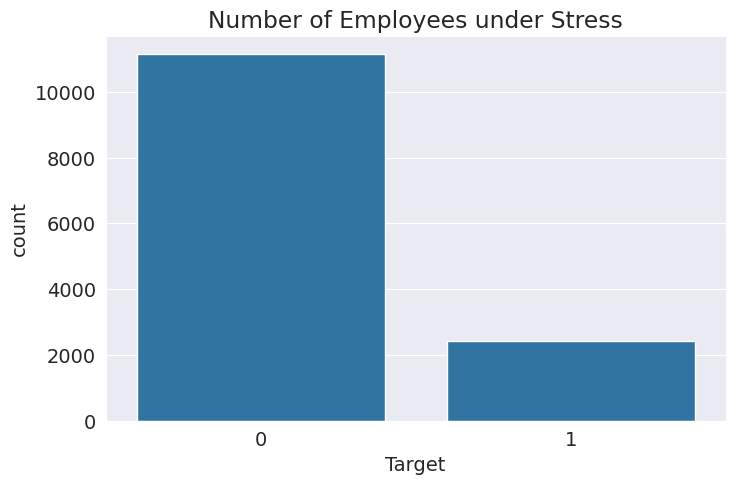

In [ ]:
m.figure(figsize=(8,5))
m.title('Number of Employees under Stress')
s.countplot(x = df.Target)

<Axes: title={'center': 'Job Satisfaction vs Education Field'}, xlabel='EducationField', ylabel='JobSatisfaction'>

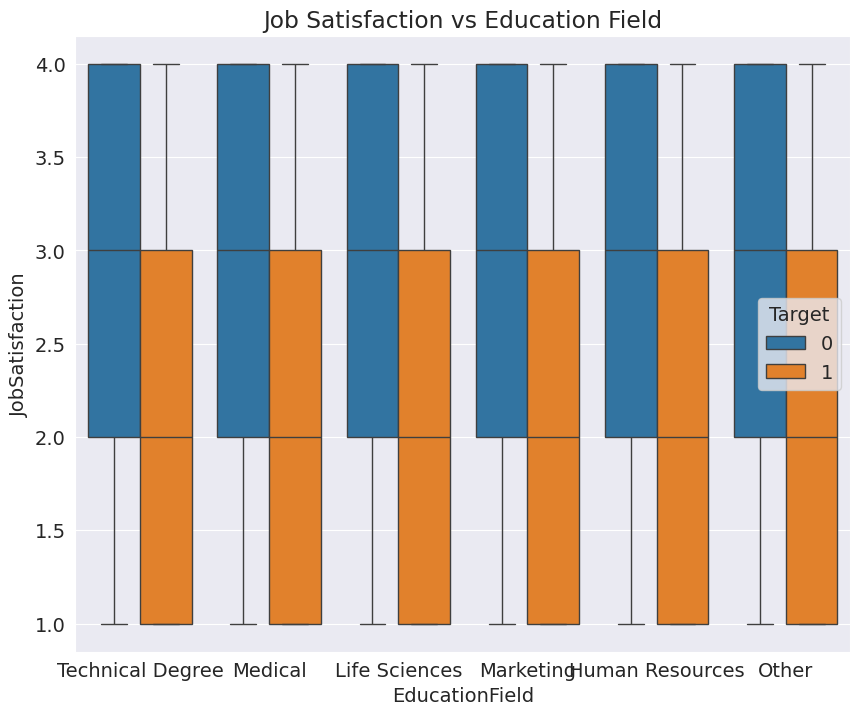

In [ ]:
m.figure(figsize=(10,8))
m.title('Job Satisfaction vs Education Field')
s.boxplot(data=train_raw, x='EducationField', y='JobSatisfaction', hue='Target')

<Axes: title={'center': 'Average Daily Hours vs Has Flexible Timings'}, xlabel='HasFlexibleTimings', ylabel='AvgDailyHours'>

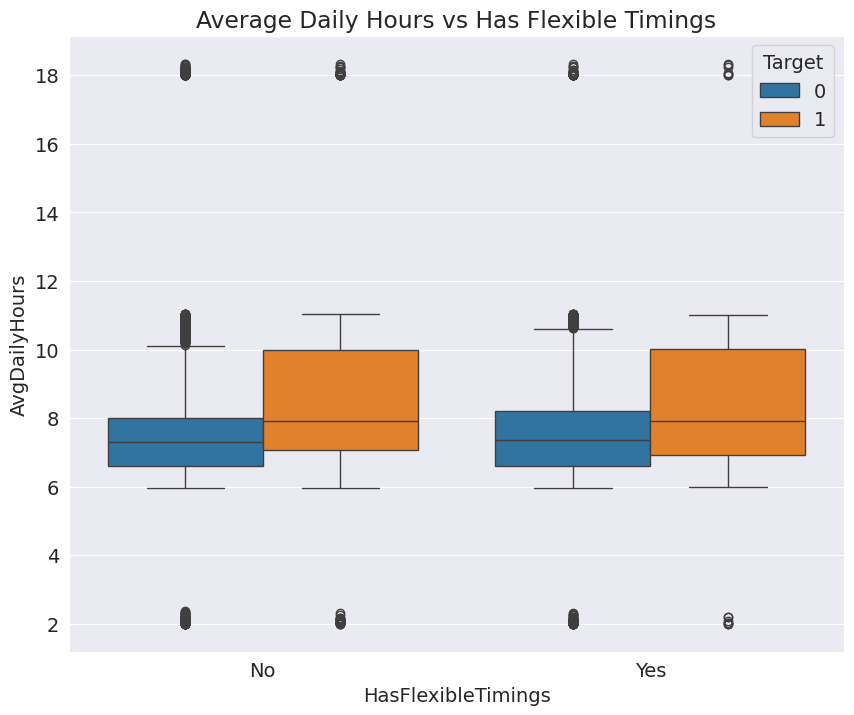

In [ ]:
m.figure(figsize=(10,8))
m.title('Average Daily Hours vs Has Flexible Timings')
s.boxplot(x='HasFlexibleTimings', y='AvgDailyHours', hue='Target', data=train_raw)

<ipython-input-16-c543e2720ff9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['JobSatisfaction'])


<Axes: xlabel='JobSatisfaction', ylabel='Density'>

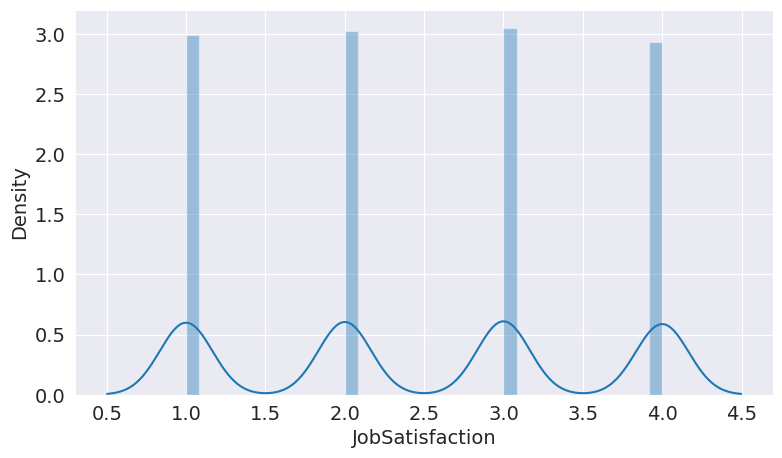

In [ ]:
s.distplot(df['JobSatisfaction'])

<ipython-input-17-b792c09806a3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['Education'])


<Axes: xlabel='Education', ylabel='Density'>

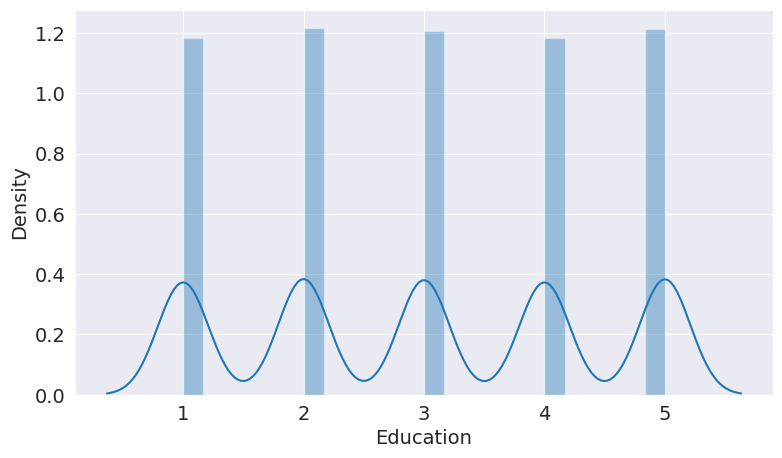

In [ ]:
s.distplot(df['Education'])

<ipython-input-18-50eb46c54319>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

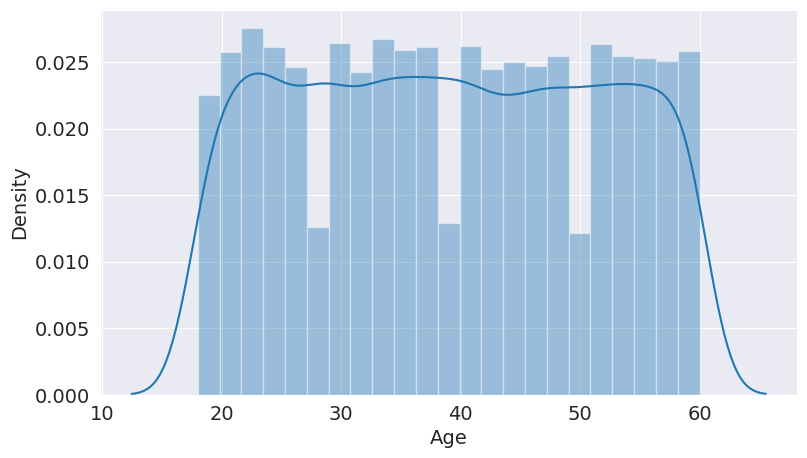

In [ ]:
s.distplot(df['Age'])

<ipython-input-19-63aa47cb1936>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['YearsAtCompany'])


<Axes: xlabel='YearsAtCompany', ylabel='Density'>

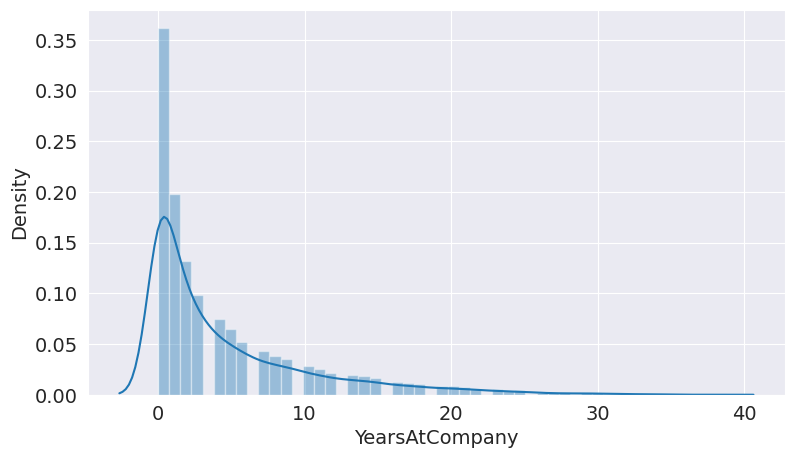

In [ ]:
s.distplot(df['YearsAtCompany'])

<Axes: title={'center': 'Job Involvement vs IsIndividualContributor'}, xlabel='IsIndividualContributor', ylabel='JobInvolvement'>

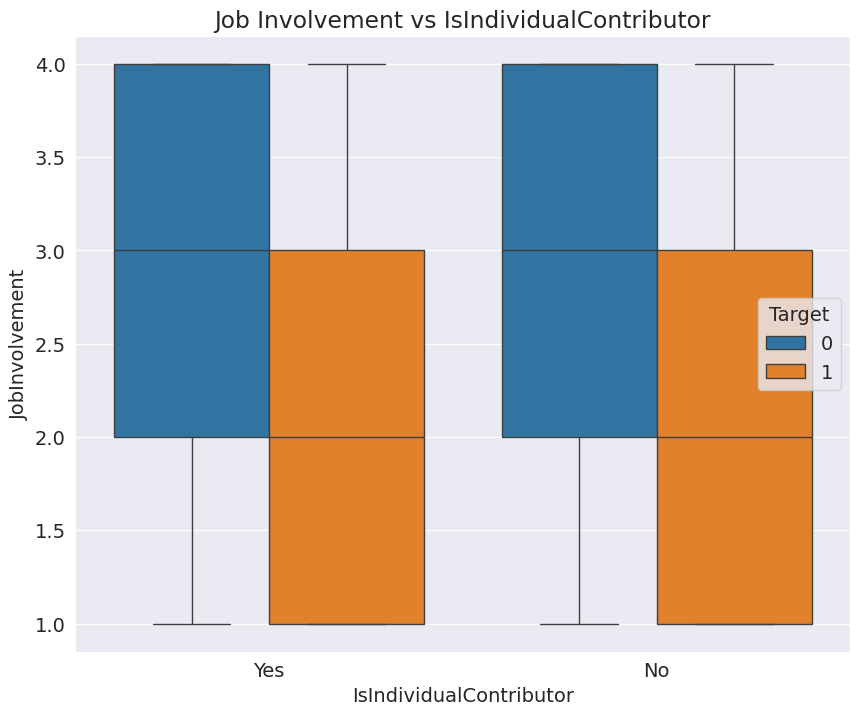

In [ ]:
m.figure(figsize=(10,8))
m.title('Job Involvement vs IsIndividualContributor')
s.boxplot(x=train_raw.IsIndividualContributor, y=train_raw.JobInvolvement, hue=train_raw.Target)

<ipython-input-21-031415edf912>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['YearsSinceLastPromotion'])


<Axes: xlabel='YearsSinceLastPromotion', ylabel='Density'>

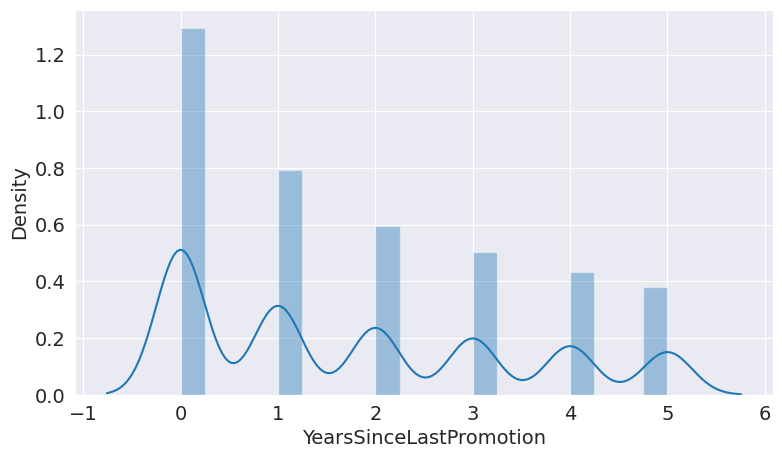

In [ ]:
s.distplot(df['YearsSinceLastPromotion'])

<ipython-input-22-82e4f9e11aa0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['YearsWithCurrManager'])


<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

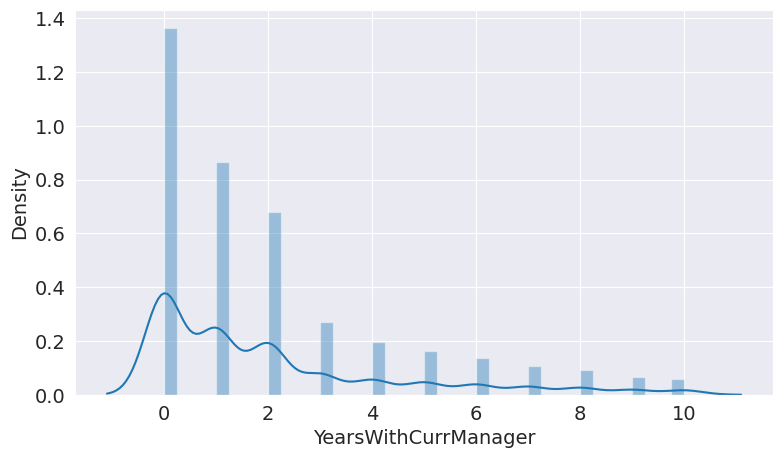

In [ ]:
s.distplot(df['YearsWithCurrManager'])

Defining Utility Functions

In [ ]:
def Data_Processor(temp_frame):
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    temp = p.DataFrame()
    temp_frame['HasFlexibleTimings']= label_encoder.fit_transform(temp_frame['HasFlexibleTimings'])
    temp_frame['IsIndividualContributor']= label_encoder.fit_transform(temp_frame['IsIndividualContributor'])
    temp_frame['RemoteWorkSatistfaction']= label_encoder.fit_transform(temp_frame['RemoteWorkSatistfaction'])
    temp_frame['WorkLoadLevel']= label_encoder.fit_transform(temp_frame['WorkLoadLevel'])
    temp = p.concat([p.get_dummies(temp_frame[col]) for col in ['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus']], axis=1)
    temp.groupby(level=0, axis=1).sum()
    temp_frame = p.concat([temp_frame, temp], axis=1)
    temp_frame.drop(['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'EmployeeID'], axis=1, inplace=True)
    return temp_frame;

In [ ]:
def Normalize(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    frame = p.DataFrame();
    frame = df
    frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome',
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']] = scaler.fit_transform(frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome',
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]);
    return frame;

In [ ]:
df

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,36.0,6.45,Sales,5,Technical Degree,Male,No,Yes,...,1,Medium,3,8.0,2,2,Low,8.0,1.0,8.0
1,100002,0,24.0,8.48,Sales,5,Technical Degree,Male,No,Yes,...,1,Very High,2,1.0,5,2,High,0.0,0.0,0.0
2,100003,0,45.0,6.93,Research & Development,2,Technical Degree,Female,No,Yes,...,4,High,1,17.0,6,4,Low,17.0,4.0,10.0
4,100005,0,30.0,7.30,Human Resources,3,Life Sciences,Female,No,Yes,...,1,Very High,4,9.0,6,1,Medium,3.0,3.0,0.0
5,100006,0,31.0,10.78,Sales,2,Medical,Male,Yes,Yes,...,2,High,1,9.0,0,4,High,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,115995,0,24.0,7.32,Research & Development,2,Other,Female,No,No,...,4,Very High,2,3.0,5,3,Low,3.0,3.0,1.0
15996,115997,0,56.0,7.60,Sales,2,Technical Degree,Female,No,No,...,2,Low,2,7.0,2,1,Medium,6.0,2.0,2.0
15997,115998,0,26.0,6.52,Human Resources,1,Other,Female,No,Yes,...,3,High,4,5.0,3,4,High,1.0,1.0,1.0
15998,115999,0,29.0,6.11,Research & Development,4,Human Resources,Female,Yes,No,...,1,High,2,6.0,3,1,High,1.0,1.0,1.0


In [ ]:
norm_df = Normalize(df)

<ipython-input-24-f2ee93ded219>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.08034217 -0.31334039  0.17718272 ... -0.16618331 -0.08034217
  0.21397199]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome',
<ipython-input-24-f2ee93ded219>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.90658344 -0.91669933  0.54192688 ... -1.64601244 -1.64601244
  0.17727033]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome',


In [ ]:
norm_df

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,-0.242771,-0.727341,Sales,5,Technical Degree,Male,No,Yes,...,1,Medium,3,-0.137399,2,2,Low,0.576294,1.0,2.432346
1,100002,0,-1.212807,0.390193,Sales,5,Technical Degree,Male,No,Yes,...,1,Very High,2,-0.924228,5,2,High,-0.778768,0.0,-0.828707
2,100003,0,0.484755,-0.463096,Research & Development,2,Technical Degree,Female,No,Yes,...,4,High,1,0.874237,6,4,Low,2.100738,4.0,3.247609
4,100005,0,-0.727789,-0.259408,Human Resources,3,Life Sciences,Female,No,Yes,...,1,Very High,4,-0.024995,6,1,Medium,-0.270620,3.0,-0.828707
5,100006,0,-0.646953,1.656365,Sales,2,Medical,Male,Yes,Yes,...,2,High,1,-0.024995,0,4,High,-0.440003,2.0,-0.013443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,115995,0,-1.212807,-0.248398,Research & Development,2,Other,Female,No,No,...,4,Very High,2,-0.699420,5,3,Low,-0.270620,3.0,-0.421075
15996,115997,0,1.373954,-0.094255,Sales,2,Technical Degree,Female,No,No,...,2,Low,2,-0.249803,2,1,Medium,0.237528,2.0,-0.013443
15997,115998,0,-1.051134,-0.688805,Human Resources,1,Other,Female,No,Yes,...,3,High,4,-0.474612,3,4,High,-0.609385,1.0,-0.421075
15998,115999,0,-0.808625,-0.914514,Research & Development,4,Human Resources,Female,Yes,No,...,1,High,2,-0.362208,3,1,High,-0.609385,1.0,-0.421075


 Find Correlations of the Dependent and Independent variables


<Axes: >

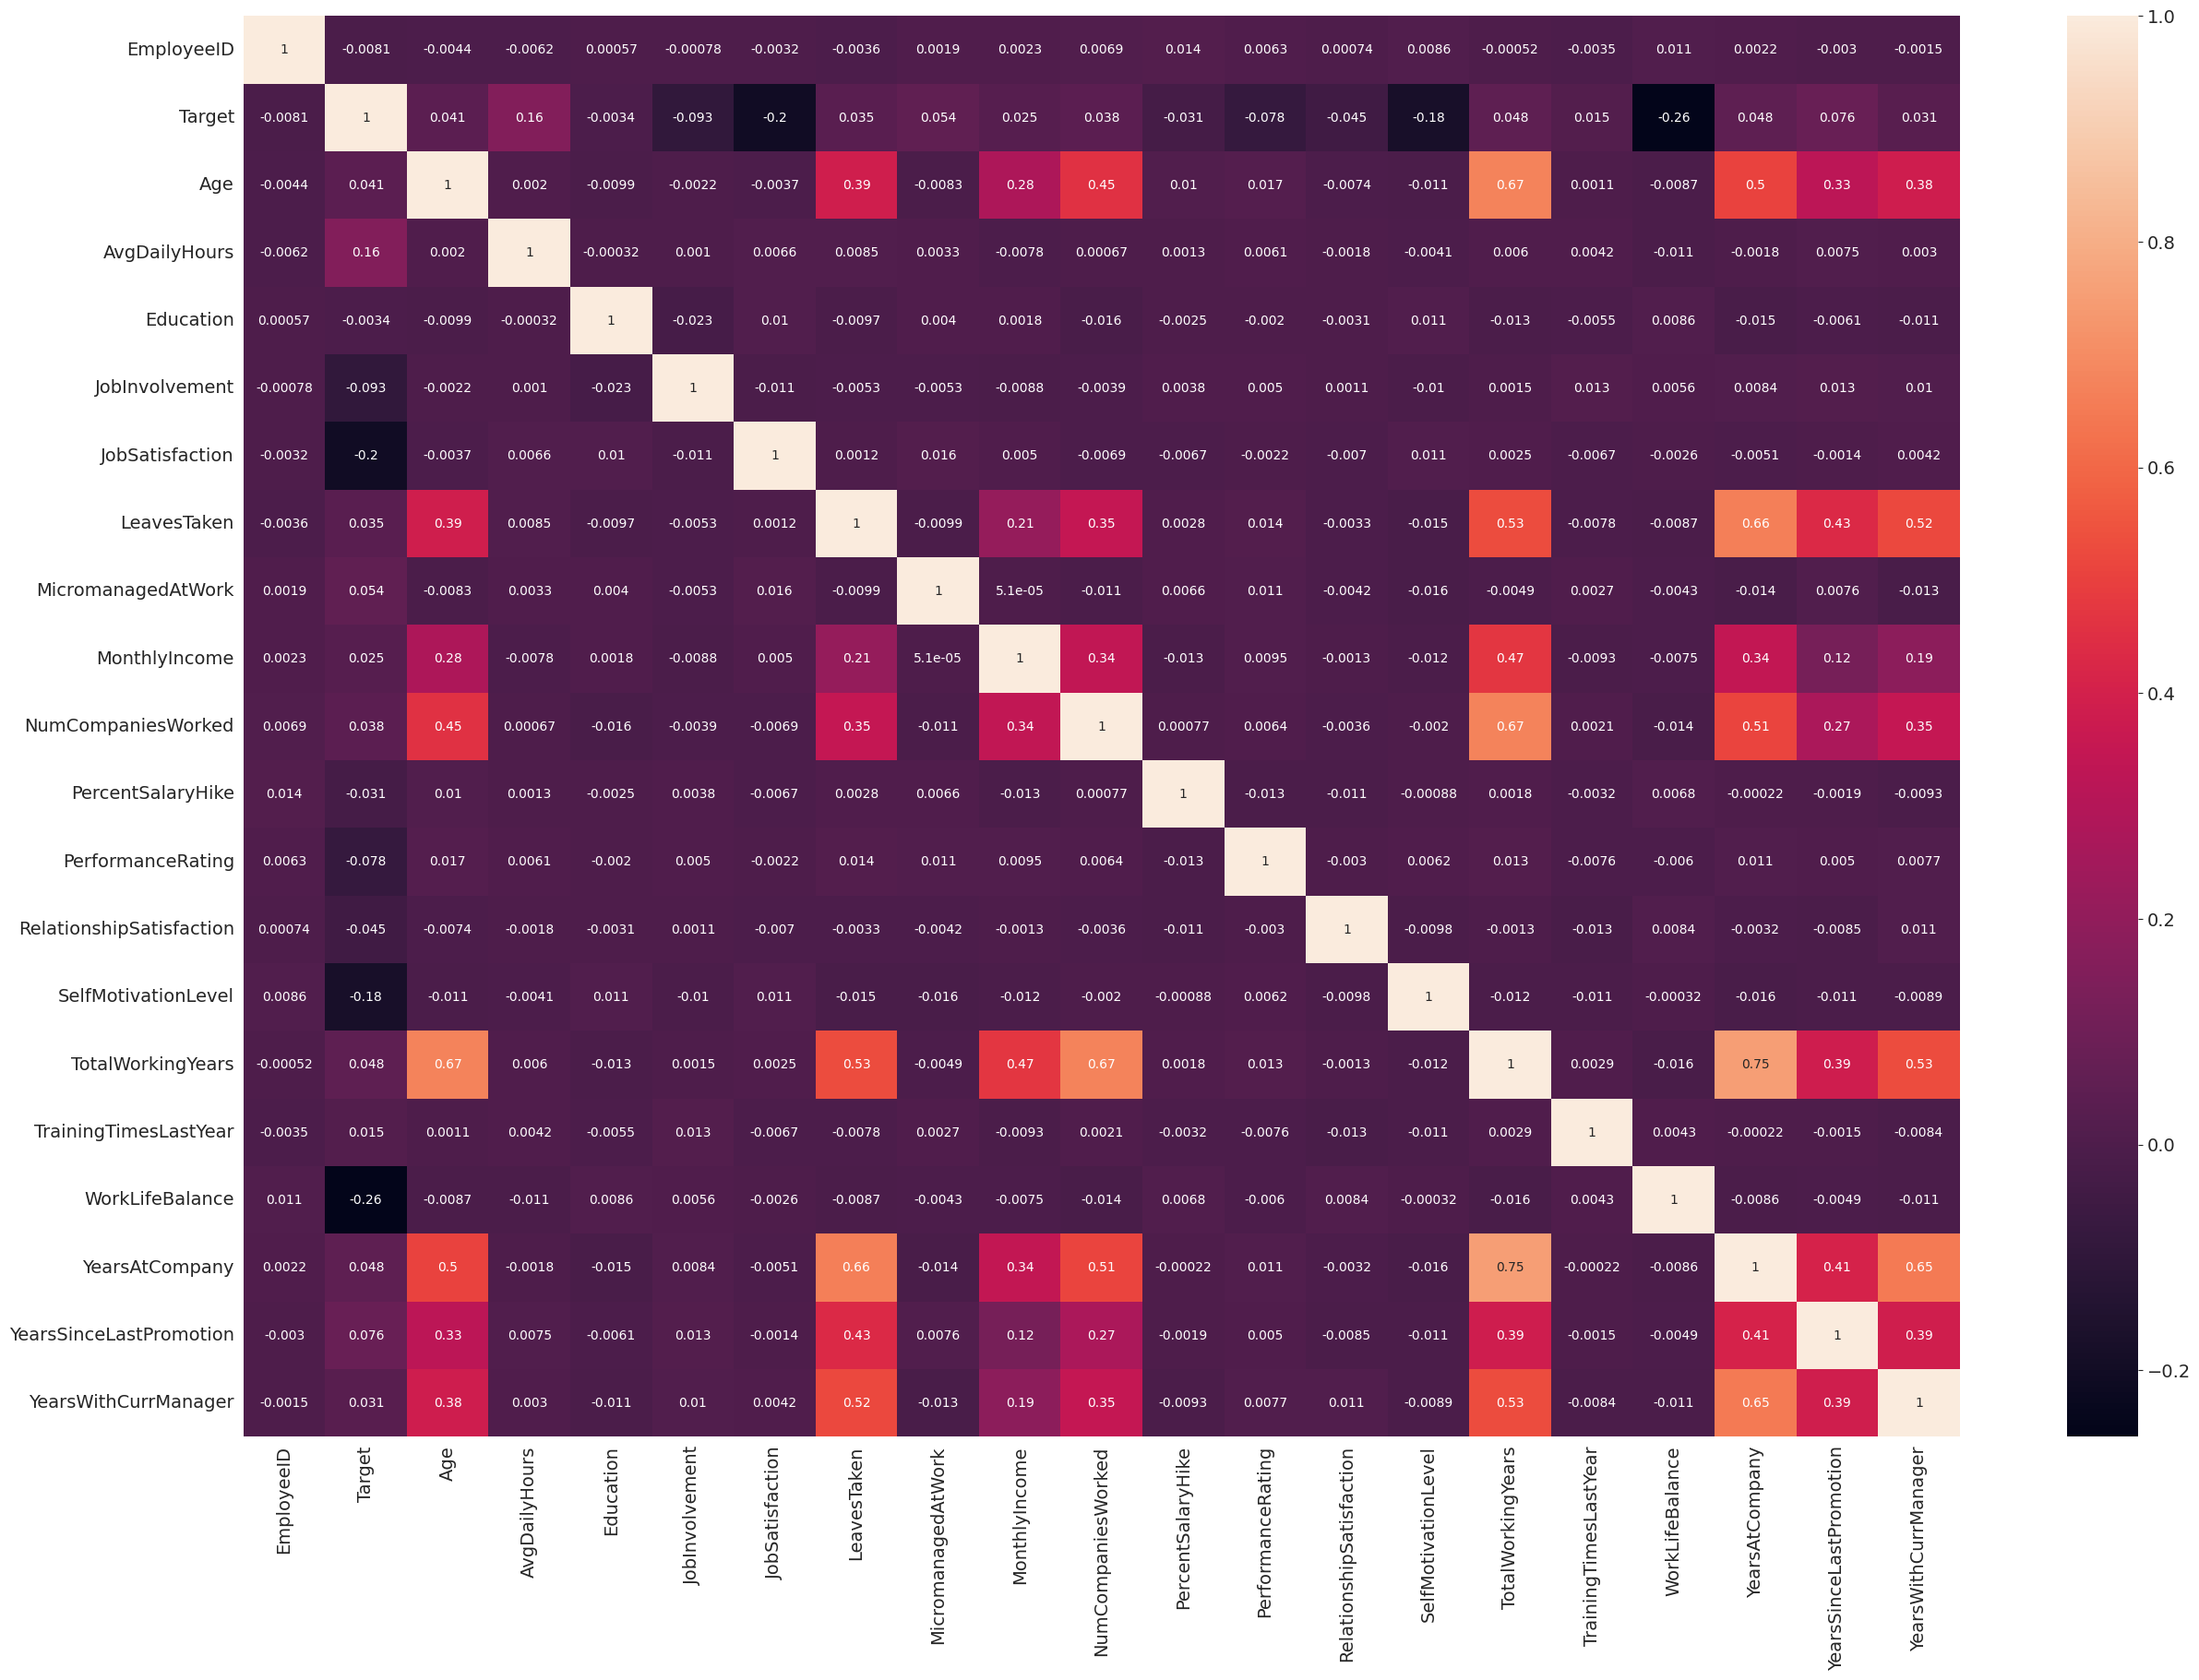

In [ ]:
m.figure(figsize=(30,20))
s.heatmap(norm_df.corr(numeric_only=True),annot=True, annot_kws={"fontsize":10})

In [ ]:
norm_df.columns

Index(['EmployeeID', 'Target', 'Age', 'AvgDailyHours', 'Department',
       'Education', 'EducationField', 'Gender', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'LeavesTaken', 'MaritalStatus', 'MicromanagedAtWork',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'RemoteWorkSatistfaction', 'SelfMotivationLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'WorkLoadLevel',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
norm_df = Data_Processor(norm_df)
X = norm_df[['Age', 'AvgDailyHours', 'Education', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobSatisfaction',
       'LeavesTaken', 'MicromanagedAtWork', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
       'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single']]
y = norm_df['Target']

<ipython-input-23-a7ba639f4520>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_frame['HasFlexibleTimings']= label_encoder.fit_transform(temp_frame['HasFlexibleTimings'])
<ipython-input-23-a7ba639f4520>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_frame['IsIndividualContributor']= label_encoder.fit_transform(temp_frame['IsIndividualContributor'])
<ipython-input-23-a7ba639f4520>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (10843, 52) (10843,)
Test set: (2711, 52) (2711,)


LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
yhatlr = logistic.predict(X_test)
yhatlr

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
jaccard_score(y_test, yhatlr)

np.float64(0.3752244165170557)

In [ ]:
log_loss(y_test, yhatlr)

4.626776606201685

In [ ]:
log_grid_param = {'C': [0.64, 0.66, 0.67, 0.68, 0.69, 0.7, 0.75],
                 'solver':['liblinear', 'sag', 'saga']}

In [ ]:
log_grid_srch = GridSearchCV(estimator=logistic, param_grid=log_grid_param, scoring='accuracy',
                            n_jobs=-1)

In [ ]:
log_grid_srch.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.64, 0.66, 0.67, 0.68, 0.69, 0.7, 0.75],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [ ]:
logistic_best_parameters = log_grid_srch.best_params_
print(logistic_best_parameters)

{'C': 0.68, 'solver': 'liblinear'}


In [ ]:
logistic_best_result = log_grid_srch.best_score_
print('Accuracy of Logistic Regression: ', logistic_best_result)

Accuracy of Logistic Regression:  0.8764174913533367


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as n
ks = 10
error_rate = []

# Will take some time
for i in range(1,ks):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    yhatknn = knn.predict(X_test)
    error_rate.append(n.mean(yhatknn != y_test))

Text(0, 0.5, 'Error Rate')

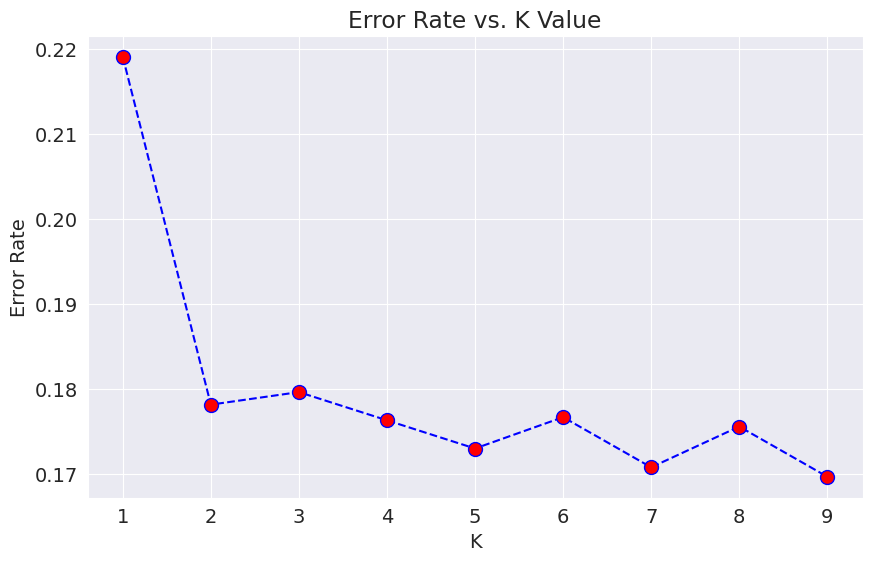

In [ ]:
m.figure(figsize=(10,6))
m.plot(range(1,ks),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
m.title('Error Rate vs. K Value')
m.xlabel('K')
m.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
yhatknn = knn.predict(X_test)

In [ ]:
print("Accuracy of KNN: ", accuracy_score(y_test, yhatknn))

Accuracy of KNN:  0.8270011066027296
